In [2]:
import os
import shutil
import numpy as np
import pandas as pd
import random
import cv2
from tqdm import tqdm

import matplotlib.pyplot as plt

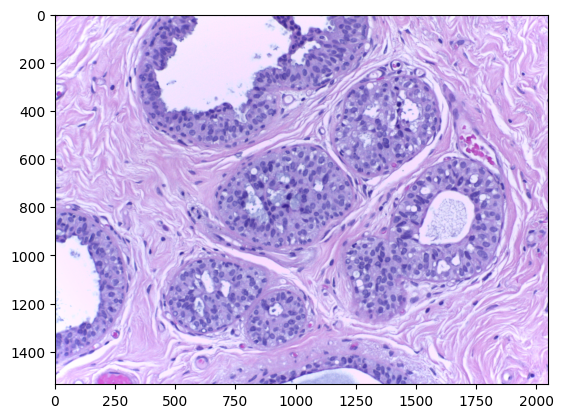

In [4]:
plt.imshow(plt.imread("kaggle/input/bach-breast-cancer-histology-images/ICIAR2018_BACH_Challenge/ICIAR2018_BACH_Challenge/Photos/Benign/b003.tif"))

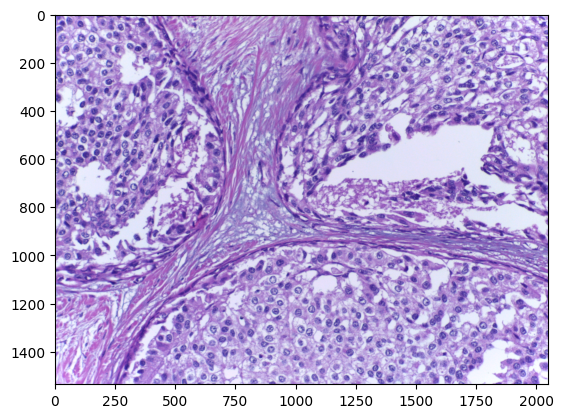

In [5]:
p = "kaggle/input/bach-breast-cancer-histology-images/ICIAR2018_BACH_Challenge/ICIAR2018_BACH_Challenge/Photos/InSitu/is001.tif"
plt.imshow(plt.imread(p))

In [6]:
def SEED_ALL(seed=1510):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    
SEED_ALL()

In [7]:
MAIN_DIR = "kaggle/input/bach-breast-cancer-histology-images/ICIAR2018_BACH_Challenge/ICIAR2018_BACH_Challenge/Photos"

In [8]:
BASE_DIR = "kaggle/working/bach-train"

# create two subfolders in base dir
TRAIN_DIR = os.path.join(BASE_DIR, "training")
VAL_DIR = os.path.join(BASE_DIR, "validation")
TEST_DIR = os.path.join(BASE_DIR, "test")

# if cell is run multiple times, empty tree
if os.path.exists(BASE_DIR):
    shutil.rmtree(BASE_DIR)

os.makedirs(BASE_DIR)

os.makedirs(TRAIN_DIR)
os.makedirs(VAL_DIR)
os.makedirs(TEST_DIR)

In [9]:
bc_types = [file for file in os.listdir(MAIN_DIR) if os.path.isdir(os.path.join(MAIN_DIR, file))]
print("Types: ", bc_types)

# to encode labels
bc_dict = {'InSitu': 2, 'Benign': 1, 'Normal': 0, 'Invasive': 3}
print("Encode: ", bc_dict)

# to decode labels
dict_bc = {0: "Normal", 1: "Benign", 2: "InSitu", 3: "Invasive"}
print("Decode: ", dict_bc)

Types:  ['Benign', 'InSitu', 'Invasive', 'Normal']
Encode:  {'InSitu': 2, 'Benign': 1, 'Normal': 0, 'Invasive': 3}
Decode:  {0: 'Normal', 1: 'Benign', 2: 'InSitu', 3: 'Invasive'}


In [10]:
for bc in bc_types:
    train_type_folder = os.path.join(TRAIN_DIR, bc)
    val_type_folder = os.path.join(VAL_DIR, bc)
    test_type_folder = os.path.join(TEST_DIR, bc)
    
    os.makedirs(train_type_folder)
    os.makedirs(val_type_folder)
    os.makedirs(test_type_folder)

In [12]:
df = pd.read_csv("kaggle/working/bach_data.csv", index_col=0)
df.head()

,path,type
0,kaggle/input/bach-breast-cancer-histology-imag...,Benign
1,kaggle/input/bach-breast-cancer-histology-imag...,Benign
2,kaggle/input/bach-breast-cancer-histology-imag...,Benign
3,kaggle/input/bach-breast-cancer-histology-imag...,Benign
4,kaggle/input/bach-breast-cancer-histology-imag...,Benign


In [13]:
df["type"] = df["type"].map(bc_dict)
df.head()

,path,type
0,kaggle/input/bach-breast-cancer-histology-imag...,1
1,kaggle/input/bach-breast-cancer-histology-imag...,1
2,kaggle/input/bach-breast-cancer-histology-imag...,1
3,kaggle/input/bach-breast-cancer-histology-imag...,1
4,kaggle/input/bach-breast-cancer-histology-imag...,1


In [14]:
from sklearn.model_selection import train_test_split

type_dict = dict({0: list(),
                      1: list(),
                      2: list(),
                      3: list()})

for i in range(len(df)):
    path = df["path"][i]
    type_ = df["type"][i]
    if os.path.getsize(path):
        type_dict[type_].append(path)
    else:
        print("Path:\n{} is zero length\nAnd Type: {}, so ignoring.".format(path, type_))

In [15]:
len(type_dict[0]), len(type_dict[1]), len(type_dict[2]), len(type_dict[3])

(101, 101, 101, 101)

In [17]:
print("Training size: ", len(x_train), len(y_train))
print("Val size: ", len(x_val), len(y_val))
print("Test size: ", len(x_test), len(y_test))

Training size:  242 242
Val size:  81 81
Test size:  81 81


In [18]:
curr_dir = os.path.join(BASE_DIR, "test")

for i, p in enumerate(x_test.reset_index(drop=True)):
    type_ = y_test.reset_index()["type"][i]
    dec_type = dict_bc[type_]
    name = x_test.reset_index()["path"][i].split("/")[-1]
    toto = os.path.join(curr_dir, dec_type)
    to_copy = os.path.join(toto, name)
    shutil.copyfile(p, to_copy)

In [19]:
curr_dir = os.path.join(BASE_DIR, "training")

for i, p in enumerate(x_train.reset_index(drop=True)):
    type_ = y_train.reset_index()["type"][i]
    dec_type = dict_bc[type_]
    name = x_train.reset_index()["path"][i].split("/")[-1]
    toto = os.path.join(curr_dir, dec_type)
    to_copy = os.path.join(toto, name)
    shutil.copyfile(p, to_copy)

In [20]:
curr_dir = os.path.join(BASE_DIR, "validation")

for i, p in enumerate(x_val.reset_index(drop=True)):
    type_ = y_val.reset_index()["type"][i]
    dec_type = dict_bc[type_]
    name = x_val.reset_index()["path"][i].split("/")[-1]
    toto = os.path.join(curr_dir, dec_type)
    to_copy = os.path.join(toto, name)
    shutil.copyfile(p, to_copy)

In [23]:
print(f"training size: {([len(os.listdir((os.path.join('kaggle/working/bach-train/training', bc)))) for bc in os.listdir('kaggle/working/bach-train/training')])}")
print(f"Val size: {([len(os.listdir(os.path.join('kaggle/working/bach-train/validation', bc))) for bc in os.listdir('kaggle/working/bach-train/validation')])}")
print(f"Test size: {([len(os.listdir(os.path.join('kaggle/working/bach-train/test', bc))) for bc in os.listdir('kaggle/working/bach-train/test')])}")


training size: [61, 60, 60, 61]
Val size: [20, 20, 21, 20]
Test size: [20, 21, 20, 20]
